In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 40kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=588568bf1d3eb46dff1451192c1d76b9dd96f0e8961137cdf22708ec057a798d
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


新垣結衣: [-0.11871806  0.08895587  0.03081574 -0.05759809 -0.17234237  0.01303162
 -0.08795334 -0.05214896  0.14785978 -0.14611185  0.1809181  -0.0811779
 -0.21694501 -0.00995512 -0.05358708  0.22342917 -0.17742431 -0.21617895
 -0.01101371  0.01965623  0.06497414  0.04884245 -0.03296424  0.01557688
 -0.13503981 -0.34410459 -0.08365456 -0.01749294 -0.04925766 -0.05974016
 -0.03939342  0.06534347 -0.1694078   0.00273443  0.09510457  0.13980663
 -0.00640149 -0.10996169  0.11728266 -0.03646653 -0.33691105  0.03474554
  0.1067851   0.22308409  0.1727621  -0.00730357 -0.04260437 -0.14155892
  0.13114557 -0.17051135  0.05163314  0.16024536  0.09868652  0.05714351
  0.03427528 -0.13911743  0.0134485   0.12450286 -0.10232828 -0.04749877
  0.08061841 -0.03871644  0.04755296 -0.15690231  0.1460149   0.06327902
 -0.10858482 -0.26346976  0.13560417 -0.15498176 -0.09729822  0.11163621
 -0.15510781 -0.23469773 -0.29418373  0.00913774  0.26308423  0.12756225
 -0.15842122  0.05935273  0.08414911  0.011703

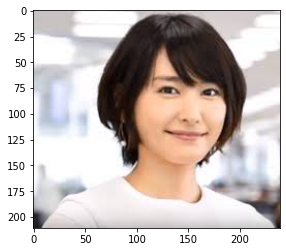

In [7]:
import face_recognition
import matplotlib.pyplot as plt
img = face_recognition.load_image_file("新垣結衣.jpg")
en = face_recognition.face_encodings(img)
print("新垣結衣:",en[0])
plt.imshow(img)

In [12]:
import glob
subs = ["jpg", "png", "jpeg"]

names, encodings = [], []
for fn in glob.glob("*"):
    sub = fn.split(".")[-1]
    if sub.lower() in subs:
        n = fn.split(".")[0]
        names.append(n)
        img = face_recognition.load_image_file(fn)
        en = face_recognition.face_encodings(img)[0]
        encodings.append(en)
print(names)
print(encodings)

['蔡英文', '韓國瑜', '阿信', '新垣結衣']
[array([-8.29606205e-02,  4.21728268e-02,  7.74923638e-02, -5.59265390e-02,
       -6.29026517e-02, -4.41721976e-02, -6.25699088e-02, -1.18698932e-01,
        1.33995950e-01, -1.11370504e-01,  2.14128837e-01, -4.97692302e-02,
       -2.30027303e-01, -6.40537813e-02, -4.79551628e-02,  1.98993474e-01,
       -1.49287909e-01, -1.40318602e-01, -1.01214506e-01, -4.34857383e-02,
        6.54353350e-02, -4.16964665e-02,  4.58860099e-02,  2.29914561e-02,
       -1.05373353e-01, -3.84753644e-01, -1.15461282e-01, -6.91238940e-02,
        3.54494900e-04, -5.06581888e-02, -6.43716455e-02,  2.06563547e-02,
       -1.76966339e-01, -2.20613591e-02,  1.09347999e-02,  1.06148824e-01,
       -1.39992572e-02, -1.29498988e-01,  1.85056701e-01, -2.36668885e-02,
       -2.92480648e-01,  1.55777335e-02,  6.52008802e-02,  1.86255544e-01,
        2.20990330e-01,  5.36388755e-02,  1.55213661e-02, -1.24887034e-01,
        1.59557521e-01, -1.65316716e-01,  4.20300514e-02,  1.35519490e

請輸入網址:https://s.yimg.com/ny/api/res/1.2/o_se3or7n4zE9VB8py_nrA--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/https://media.zenfs.com/ko/news_tvbs_com_tw_938/e26ce4aea2bb4968349d551079ce8462


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 蔡英文 的距離: 0.6300181477186665
跟 韓國瑜 的距離: 0.6752264390045257
跟 阿信 的距離: 0.5346487642178265
跟 新垣結衣 的距離: 0.39466903182084995
應該是: 新垣結衣
--------------------------------------------------


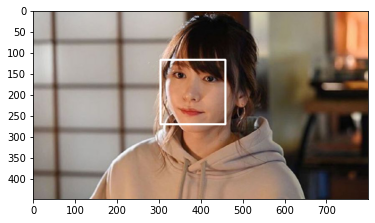

In [13]:
import requests
import cv2

url = input("請輸入網址:")
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)

ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)

for top, right, bottom, left in locs:
    # 圖片, 左上座標, 右下座標, 顏色, 粗細
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 4)

for en in ens:
    distances = face_recognition.face_distance(en, encodings)
    for n, d in zip(names, distances):
        print("跟", n, "的距離:", d)
    idx = distances.argmin(axis=-1)
    print("應該是:", names[idx])
    print("-" * 50)

plt.imshow(img)